In [6]:
import numpy as np
import matplotlib.pylab as plt

from tensorflow.examples.tutorials.mnist import input_data

### RVAE X_clean

In [ ]:
# on the way

### RPCA X_clean

* MNIST

In [2]:
mnist29 = np.load("rpca_MNIST_clean/0.29/x_clean.npy")
mnist05 = np.load("rpca_MNIST_clean/0.05/x_clean.npy")

In [2]:
def plot(x,title):
    h = w = 28
    # plot of generation
    n = np.sqrt(16).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x[i*n+j, :].reshape(28, 28)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
    plt.title(title)
#     plt.savefig("./pic/"+title)
    plt.show()

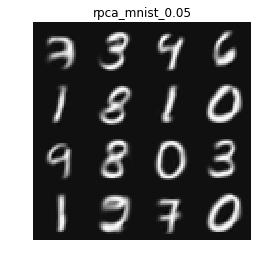

In [4]:
plot(mnist05,"rpca_mnist_0.05")

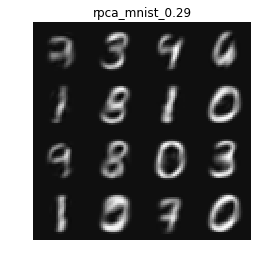

In [5]:
plot(mnist29,"rpca_mnist_0.29")

* Fashion MNIST

In [6]:
fashion09 = np.load("rpca_Fashion_clean/0.09/x_clean.npy")
fashion41 = np.load("rpca_Fashion_clean/0.41/x_clean.npy")

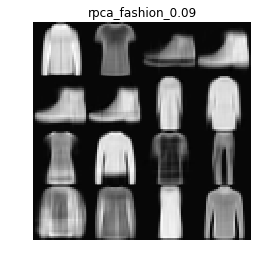

In [7]:
plot(fashion09,"rpca_fashion_0.09")

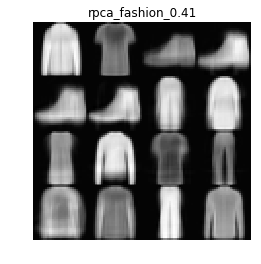

In [8]:
plot(fashion41,"rpca_fashion_0.41")

### LPF X_clean

In [3]:
def noise_filter(data,step):
    m,n = data.shape
    clean = data.copy()
    for i in range(0,m):
        for j in range(0,n):
            start_r = max(0,i-step)
            end_r = min(n,i+step)
            start_c = max(0,j-step)
            end_c = min(n,j+step)
            clean[i,j] = np.mean(data[start_r:end_r,start_c:end_c])
    return clean

def multi_image(data,step=1,runs=2):
    cleaned = np.zeros(data.shape)
    dim= int(np.sqrt(data.shape[1]))
    for r in range(runs):
        for i,ins in enumerate(data):
            cleaned[i] = noise_filter(ins.reshape(dim,dim),step=step).reshape(data.shape[1])
    return cleaned

In [4]:
def corrupt(X_o,corNum=10):
    X = X_o.copy()
    N,p = X.shape[0],X.shape[1]
    
    for i in range(N):
        loclist = np.random.randint(0, p, size = corNum)
        for j in loclist:
            if X[i,j] > 0.5:
                X[i,j] = 0
            else:
                X[i,j] = 1
    return X

* MNIST

In [14]:
mnist = input_data.read_data_sets('input/mnist')
x_train_mnist = mnist.train.images[40:60]

mnist_noisy05 = corrupt(x_train_mnist, corNum = int(0.05*784))
mnist_noisy29 = corrupt(x_train_mnist, corNum = int(0.29*784))


lpf_mnist05 = multi_image(mnist_noisy05,step=1,runs=2)
lpf_mnist29 = multi_image(mnist_noisy29,step=1,runs=2)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting input/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting input/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting input/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting input/mnist/t10k-labels-idx1-ubyte.gz


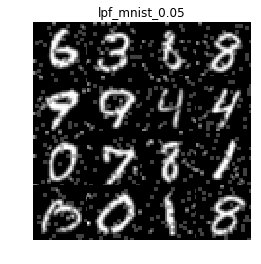

In [15]:
plot(lpf_mnist05,"lpf_mnist_0.05")

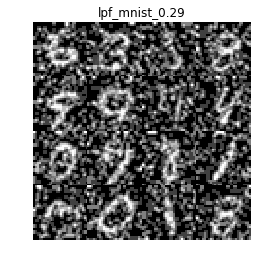

In [16]:
plot(lpf_mnist29,"lpf_mnist_0.29")

* Fashion MNIST

In [11]:
fashion = input_data.read_data_sets('input/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')
x_train_fashion = fashion.train.images[40:60]

fashion_noisy09 = corrupt(x_train_fashion, corNum = int(0.09*784))
fashion_noisy41 = corrupt(x_train_fashion, corNum = int(0.41*784))


lpf_fashion09 = multi_image(fashion_noisy09,step=1,runs=2)
lpf_fashion41 = multi_image(fashion_noisy41,step=1,runs=2)


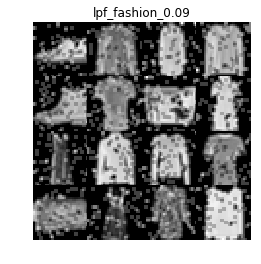

In [12]:
plot(lpf_fashion09,"lpf_fashion_0.09")

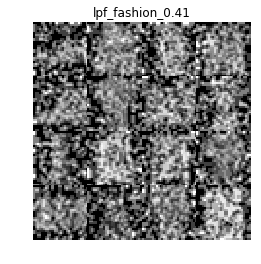

In [13]:
plot(lpf_fashion41,"lpf_fashion_0.41")